# CORRELATION ANALYSIS

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import axes3d  
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
import random
from imblearn.over_sampling import SMOTE
import rcca
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [16]:
from EDA_helper import *

In [17]:
ratings2 = pd.read_excel("../datasets/ratings_2_06-17.xlsx")
ratio = pd.read_excel("../datasets/ratio_figs_2.xlsx")
ratio = ratio.rename(columns = {'Public Date':'Data Date','EXCHANGE TICKER SYMBOL - HISTORICAL':'Ticker Symbol'})

ratio1, ratings1 = format_df(ratio, ratings2, ['Trailing P/E to Growth (PEG) ratio','Dividend Yield', 
                        'Cash Ratio', 'Total Debt/Capital', 'Operating Profit Margin Before Depreciation',
                            'Enterprise Value Multiple', 'Cash Balance/Total Liabilities'])
numer = list(ratio1.columns[4:-1])
X,Y,full = join_numerical(ratio1, ratings1, numerical=numer)
len(X)

Unique Companies in Ratings:  88
Unique Companies in Features:  42
Intersection of companies:  26


838

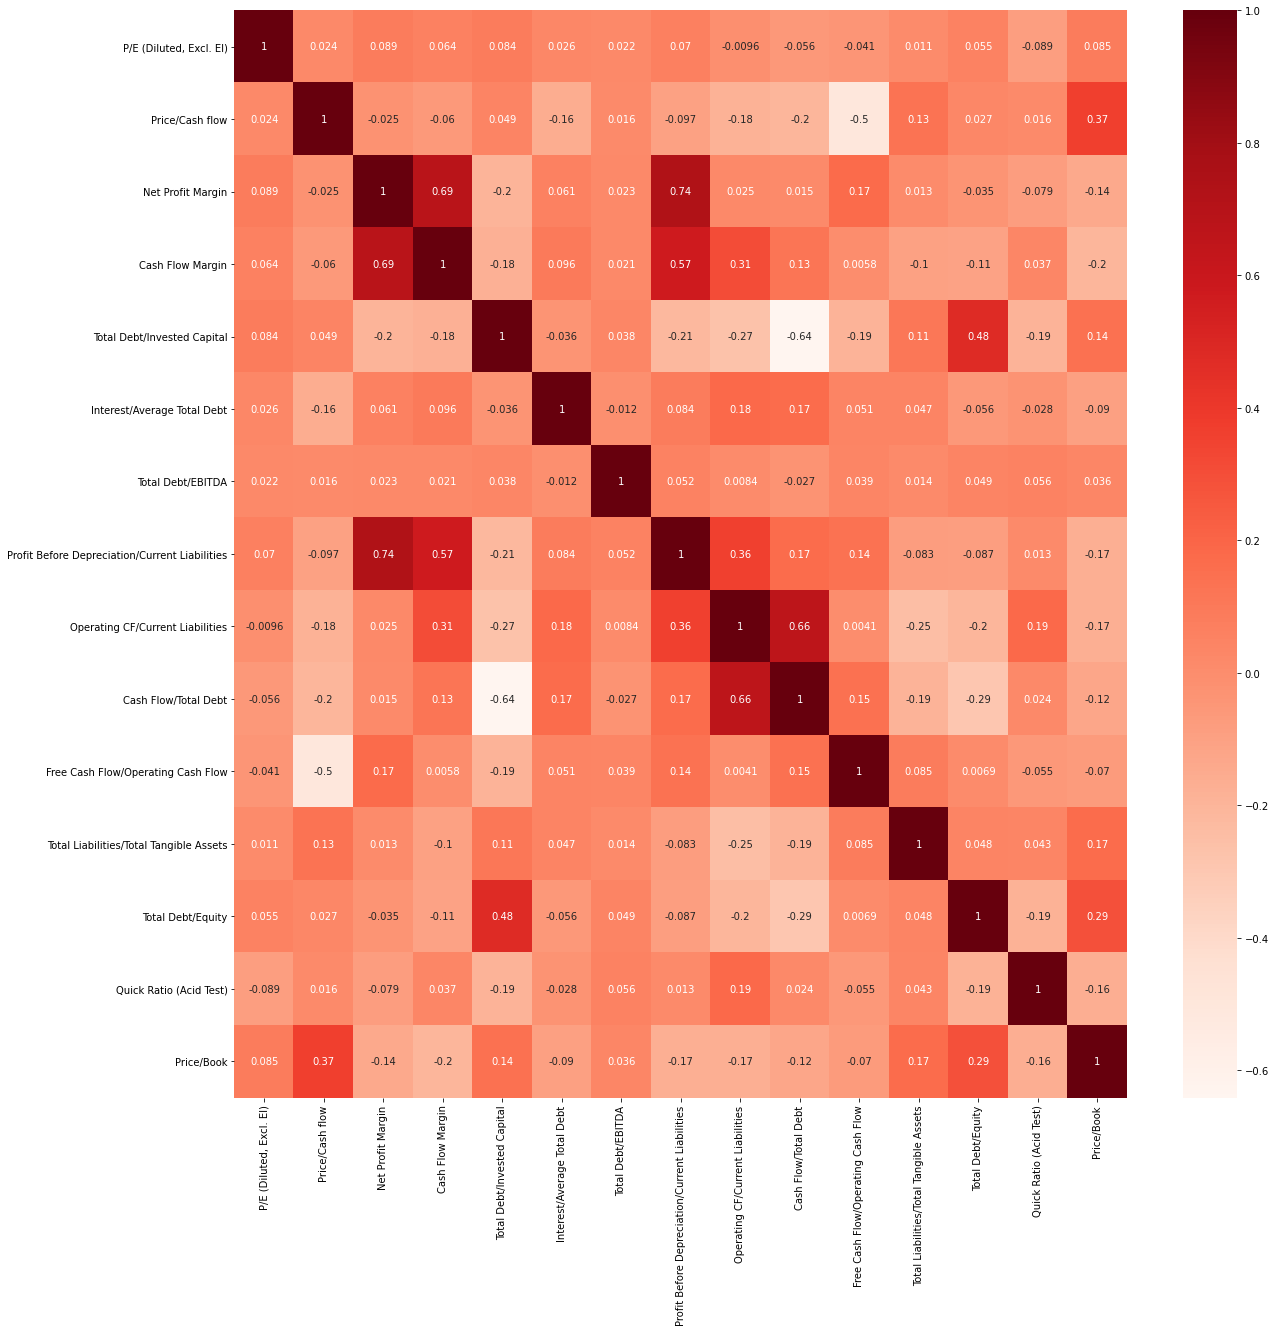

In [18]:
ac = pd.DataFrame(X,columns = numer)
cor = ac.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [19]:
scl_X = StandardScaler().fit_transform(X)
enc_Y,_ = encode(Y)

### LDA w/ Smote

In [26]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = data_split(scl_X, enc_Y, full, split=[0.8, 0.0],smote=True)

In [28]:
## TRAIN ACCURACY
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, Y_train)
# preds_test = lda.predict(X_test)
preds_train = lda.predict(X_train)
print(classification_report(Y_train, preds_train))
# print(classification_report(Y_test, preds_test))
np.mean(Y_train == preds_train)
# np.mean(Y_test == preds_test)

              precision    recall  f1-score   support

           1       0.82      0.71      0.76       395
           2       0.66      0.59      0.62       395
           3       0.58      0.49      0.53       395
           4       0.70      0.90      0.79       395
           5       0.65      0.92      0.76       395
           6       0.77      0.53      0.63       395

    accuracy                           0.69      2370
   macro avg       0.70      0.69      0.68      2370
weighted avg       0.70      0.69      0.68      2370



0.690717299578059

In [25]:
# X_train, Y_train, X_val, Y_val, X_test, Y_test = data_split(scl_X, enc_Y, full, split=[0.7, 0.1],smote=True)

# lda = LinearDiscriminantAnalysis()

# lda.fit(X_train, Y_train)
# # preds_test = lda.predict(X_test)
# preds_train = lda.predict(X_val)
# print(classification_report(Y_val, preds_train))
# # print(classification_report(Y_test, preds_test))
# np.mean(Y_val == preds_train)
# pd.Series(Y_val).value_counts()

In [29]:
## VALIDATION ACCURACY USING CV
## Getting abnormally high accuracy compared to Test bc DISTRIBUTION is different
## CV is using Train data that has SMOTE, so has different dist. of Y compared to test
## the vals have same dist. as train when doing CV on the train itself
lda_cv = LinearDiscriminantAnalysis()
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
scores = cross_val_score(lda_cv, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
scores1 = cross_val_score(lda_cv, X_train, Y_train, scoring='accuracy', n_jobs=-1)
# scores1 = cross_val_score(qda, scl_x, Y_emb, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('LDA Mean Accuracy (Stratified): %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print('LDA Mean Accuracy: %.3f (%.3f)' % (np.mean(scores1), np.std(scores1)))

# print('QDA Mean Accuracy: %.3f (%.3f)' % (np.mean(scores1), np.std(scores1)))

LDA Mean Accuracy (Stratified): 0.692 (0.011)
LDA Mean Accuracy: 0.687 (0.015)


In [30]:
## TEST ACCURACY
preds_test = lda.predict(X_test)
print(classification_report(Y_test, preds_test))
np.mean(Y_test == preds_test)

              precision    recall  f1-score   support

           1       0.17      0.80      0.28         5
           2       0.43      0.51      0.47        35
           3       0.84      0.41      0.55       101
           4       0.22      0.75      0.34         8
           5       0.50      0.62      0.56         8
           6       0.44      0.64      0.52        11

    accuracy                           0.48       168
   macro avg       0.43      0.62      0.45       168
weighted avg       0.66      0.48      0.51       168



0.48214285714285715

### LDA w/o SMOTE

In [31]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = data_split(scl_X, enc_Y, full, split=[0.8, 0.0],smote=False, seed=200)

In [34]:
## TRAIN ACCURACY
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, Y_train)
# preds_test = lda.predict(X_test)
preds_train = lda.predict(X_train)
print(classification_report(Y_train, preds_train))
# print(classification_report(Y_test, preds_test))
np.mean(Y_train == preds_train)
# np.mean(Y_test == preds_test)

              precision    recall  f1-score   support

           1       0.41      0.64      0.50        11
           2       0.65      0.38      0.48       153
           3       0.76      0.90      0.82       405
           4       0.19      0.10      0.13        29
           5       0.63      0.86      0.73        37
           6       0.63      0.34      0.44        35

    accuracy                           0.71       670
   macro avg       0.54      0.54      0.52       670
weighted avg       0.69      0.71      0.68       670



0.7089552238805971

In [ ]:
## Raw Validation w/o CV
# X_train, Y_train, X_val, Y_val, X_test, Y_test = data_split(scl_X, enc_Y, full, split=[0.7, 0.1],smote=True)

# lda = LinearDiscriminantAnalysis()

# lda.fit(X_train, Y_train)
# # preds_test = lda.predict(X_test)
# preds_train = lda.predict(X_val)
# print(classification_report(Y_val, preds_train))
# # print(classification_report(Y_test, preds_test))
# np.mean(Y_val == preds_train)
# pd.Series(Y_val).value_counts()

In [35]:
## VALIDATION ACCURACY USING CV

lda_cv = LinearDiscriminantAnalysis()
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
scores = cross_val_score(lda_cv, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
scores1 = cross_val_score(lda_cv, X_train, Y_train, scoring='accuracy', n_jobs=-1)
# scores1 = cross_val_score(qda, scl_x, Y_emb, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('LDA Mean Accuracy (Stratified): %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print('LDA Mean Accuracy: %.3f (%.3f)' % (np.mean(scores1), np.std(scores1)))

# print('QDA Mean Accuracy: %.3f (%.3f)' % (np.mean(scores1), np.std(scores1)))

LDA Mean Accuracy (Stratified): 0.692 (0.021)
LDA Mean Accuracy: 0.696 (0.035)


In [36]:
## TEST ACCURACY
preds_test = lda.predict(X_test)
print(classification_report(Y_test, preds_test))
np.mean(Y_test == preds_test)

              precision    recall  f1-score   support

           1       0.25      0.25      0.25         4
           2       0.67      0.37      0.48        43
           3       0.67      0.90      0.77        91
           4       0.00      0.00      0.00        14
           5       1.00      0.80      0.89        10
           6       0.71      0.83      0.77         6

    accuracy                           0.67       168
   macro avg       0.55      0.53      0.53       168
weighted avg       0.62      0.67      0.62       168



0.6666666666666666

### QDA w/ SMOTE

In [37]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = data_split(scl_X, enc_Y, full, split=[0.8, 0.0],smote=True)

In [38]:
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, Y_train)

preds_train = qda.predict(X_train)
print(classification_report(Y_train, preds_train))
np.mean(Y_train == preds_train)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       395
           2       0.79      0.83      0.81       395
           3       0.81      0.77      0.79       395
           4       0.99      0.99      0.99       395
           5       1.00      1.00      1.00       395
           6       1.00      1.00      1.00       395

    accuracy                           0.93      2370
   macro avg       0.93      0.93      0.93      2370
weighted avg       0.93      0.93      0.93      2370



c:\users\rodri\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.9312236286919832

In [39]:
## VALIDATION ACCURACY USING CV
qda_cv = QuadraticDiscriminantAnalysis()
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
scores = cross_val_score(qda_cv, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
scores1 = cross_val_score(qda_cv, X_train, Y_train, scoring='accuracy', n_jobs=-1)
# scores1 = cross_val_score(qda, scl_x, Y_emb, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('QDA Mean Accuracy (Stratified): %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print('QDA Mean Accuracy: %.3f (%.3f)' % (np.mean(scores1), np.std(scores1)))

# print('QDA Mean Accuracy: %.3f (%.3f)' % (np.mean(scores1), np.std(scores1)))

QDA Mean Accuracy (Stratified): 0.922 (0.008)
QDA Mean Accuracy: 0.919 (0.008)


In [40]:
preds_test = qda.predict(X_test)
print(classification_report(Y_test, preds_test))
np.mean(Y_test == preds_test)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.42      0.63      0.51        35
           3       0.78      0.73      0.76       101
           4       1.00      0.88      0.93         8
           5       1.00      0.62      0.77         8
           6       1.00      0.82      0.90        11

    accuracy                           0.70       168
   macro avg       0.70      0.61      0.64       168
weighted avg       0.72      0.70      0.70       168



c:\users\rodri\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6964285714285714

### QDA w/o SMOTE

In [42]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = data_split(scl_X, enc_Y, full, split=[0.8, 0.0])

In [43]:
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, Y_train)

preds_train = qda.predict(X_train)
print(classification_report(Y_train, preds_train))
np.mean(Y_train == preds_train)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.71      0.68      0.70       161
           3       0.87      0.87      0.87       395
           4       0.88      1.00      0.93        35
           5       1.00      1.00      1.00        39
           6       1.00      1.00      1.00        30

    accuracy                           0.85       670
   macro avg       0.91      0.93      0.92       670
weighted avg       0.85      0.85      0.85       670



c:\users\rodri\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.8492537313432836

In [44]:
## VALIDATION ACCURACY USING CV
qda_cv = QuadraticDiscriminantAnalysis()
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
scores = cross_val_score(qda_cv, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
scores1 = cross_val_score(qda_cv, X_train, Y_train, scoring='accuracy', n_jobs=-1)
# scores1 = cross_val_score(qda, scl_x, Y_emb, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('QDA Mean Accuracy (Stratified): %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
print('QDA Mean Accuracy: %.3f (%.3f)' % (np.mean(scores1), np.std(scores1)))

# print('QDA Mean Accuracy: %.3f (%.3f)' % (np.mean(scores1), np.std(scores1)))

QDA Mean Accuracy (Stratified): 0.762 (0.018)
QDA Mean Accuracy: 0.784 (0.025)


In [45]:
preds_test = qda.predict(X_test)
print(classification_report(Y_test, preds_test))
np.mean(Y_test == preds_test)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.53      0.46      0.49        35
           3       0.79      0.88      0.83       101
           4       0.78      0.88      0.82         8
           5       1.00      0.88      0.93         8
           6       1.00      0.82      0.90        11

    accuracy                           0.76       168
   macro avg       0.68      0.65      0.66       168
weighted avg       0.73      0.76      0.75       168



c:\users\rodri\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7619047619047619